## This notebook explores classifying text into gibberish vs. real (non-gibberish) text based off Amazon reviews and provides examples of how to get bag of words, TF-IDF, and word2vec features.

In [1]:
# load packages
import nltk
from nltk.stem import WordNetLemmatizer
import pandas as pd
import string

# Use sklearn to generate bag of words and TF-IDF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [5]:
import os
os.getcwd()

'C:\\Users\\geoff\\Desktop\\_CIS 9660_Andrew\\week 8 - Text_Mining'

In [6]:
# read in amazon data
# note - this file has an encoding issue, so adding encoding = "cp1252" to fix
amazon_data = pd.read_csv("Amazon.csv", encoding = "cp1252", header = None)

In [13]:
# read in gibberish data
gibberish = pd.read_csv("Gibberish.csv", encoding = "cp1252")

In [10]:
# view first few records
amazon_data.head()

,0,1
0,__label__2,Stuning even for the non-gamer: This sound tra...
1,__label__2,The best soundtrack ever to anything.: I'm rea...
2,__label__2,Amazing!: This soundtrack is my favorite music...
3,__label__2,Excellent Soundtrack: I truly like this soundt...
4,__label__2,"Remember, Pull Your Jaw Off The Floor After He..."


In [11]:
# change column names
amazon_data.columns = ["Label", "Review"]

In [14]:
# look at first few records of gibberish data
gibberish.head()

,Response,Label
0,ggg,1
1,hgghghghghghghhg,1
2,ufdhgjndfnvbhfdjvnjkmfgbdfg,1
3,dbdbdbd,1
4,dfgdfgd,1


In [16]:
gibberish.Response[:50].tolist()

['ggg',
 'hgghghghghghghhg',
 'ufdhgjndfnvbhfdjvnjkmfgbdfg',
 'dbdbdbd',
 'dfgdfgd',
 'gafsdhs fsdhgdf',
 'gfffcccd',
 '2t gtq64qyh5t2312 rty 6 4ht4gw hjw4wtg',
 'knlihbkuvjgch',
 'ddddddddddddddddddddddd',
 'hfy ky',
 'sfgh',
 'assa',
 'awdadw',
 'fe er ger ger gre ger ger',
 'gg',
 'asfg',
 'ndjty yuke6u7yk rtrwtj kmt hjw yjwetyjwety',
 'fsdfsdfs dfsdfsdfs',
 'Ghfghhhhhj',
 'tdsdfghjoiuytrdfgh',
 'Gghjkkknnbvvcccv',
 't',
 'tjdytdf',
 'dwe few fer ger ger ger ger erg',
 'gddbfnlnhfwdjxsyljryhfrtihtethgd',
 "fgfhjk'll/k;lk;",
 'DFGHJWERTERTHGJGGHHGFDGH',
 '5yyrfiijggb nvcyhgtpjhv',
 'no hbn e  non3',
 'asadadas',
 'zhzjiskwbxhdnfund cisnbcc',
 'hgjhghffhfgf',
 'fghj',
 'qwdqqdwwqwdqwdqwqdwqdwwqdwqd',
 'sgddfgfdg',
 'dfhghhj',
 'nnnnnnnnnnnnnn',
 'sdbfdgn',
 'hytre',
 'vggg',
 'Shsjdjsjdjdbd',
 'kjgjgkj',
 'refgregregr r reg',
 'vgyujhbn',
 'cccccccccccccccc',
 'ojbiuk b;o',
 'Cc c c cc',
 'sdfsdfsdf',
 'sfadsad']

In [17]:
gibberish.Label.value_counts()

1    3767
Name: Label, dtype: int64

In [21]:

# The non-gibberish dataset is large, so for our purposes here, we'll randomly sample 30,000 records
# Ideally, you could use the full dataset, or a larger sample
amazon_need = amazon_data.sample(30000, random_state = 0).reset_index(drop = True)

In [22]:
# view the reduced amazon review dataset
amazon_need

,Label,Review
0,__label__2,We LOVE Night Catch!!: We bought this book so ...
1,__label__1,RIDICULOUSLY priced!: You can get it for $24.9...
2,__label__1,Extreme Poor Quality Scans and no Help from HP...
3,__label__1,Not worth it!: This book is odd because the Fr...
4,__label__1,Taxi Driver: I've wanted to see this movie for...
...,...,...
29995,__label__1,Science Fiction or Religious Fiction ?: Believ...
29996,__label__2,It wasn't that special...: I was pretty disapo...
29997,__label__2,Whittaker & Watson: Classic text. Good encyclo...
29998,__label__1,Too small - doesn't do anything even on a smal...


In [23]:
# map Label to 0 for "non-gibberish"
amazon_need["Label"] = 0

In [31]:
# Get label (1 = gibberish, 0 = not gibberish)
y = amazon_need.Label.append(gibberish.Label)

# Get raw text data - need to create features that can actually be input into a model
x = amazon_need.Review.append(gibberish.Response)

In [39]:
# Split data into train / validation
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size = 0.7, random_state = 0)

## Bag of Words approach

In [43]:
# Bag of words
##############

# Note: Be careful when using stop_words = "english".  In various use cases, you need to think about what words
# should really constitute stop words.

# ngram_range = (1, 1) --> Uses only unigrams (single tokens)
# (2, 2) would use only bigrams; (3, 3) would use only trigrams
# lowercase = True --> Converts all text to lowercase so that "THIS" is the same as "this"

# Depending on your use case, you can also consider adjusting the min_df and max_df parameters, which 
# can be used to filter out very rare words

# See more here: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

count_vec = CountVectorizer(ngram_range = (1,1), stop_words = "english", lowercase = True)

In [46]:
# Apply count vectorizer to the training dataset
train_counts = count_vec.fit_transform(x_train)

bag_train = pd.DataFrame(train_counts.toarray(), columns=count_vec.get_feature_names())


In [47]:
# Over 54,000 unique words
bag_train.head()

,00,000,0000001,000he,000th,001,001he,0022,0025,003,...,ñmk,ñndlich,ñoefñojefñojksfeñojk,ñr,ñrmer,ñt,ñó,ône,ôoooo,ûrhead
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# Get a count of how often each word appears in the training data
word_counts = bag_train.sum()
word_counts = word_counts.sort_values(ascending = False)

In [50]:
# Look at most frequently occurring words in the training data
word_counts.head(30)

book       11134
like        6318
great       6172
good        6153
just        5593
movie       5244
read        4391
time        4012
really      3381
don         3369
love        2868
best        2650
album       2643
cd          2590
buy         2403
story       2356
better      2279
did         2151
work        2049
way         2048
ve          2037
think       2014
use         2000
product     1986
new         1980
little      1969
music       1950
bought      1927
make        1853
does        1833
dtype: int64

In [86]:
# Let's see how many words are in each observation
total_words = bag_train.sum(axis = 1)
total_words

0        45
1        27
2        41
3        54
4        21
         ..
23631    13
23632    11
23633    21
23634    74
23635    13
Length: 23636, dtype: int64

In [87]:
# Look at descriptive stats for total_words

# The median number of words for a single observation is 29, based off below.

total_words.describe()

count    23636.000000
mean        31.833644
std         19.963160
min          0.000000
25%         16.000000
50%         29.000000
75%         48.000000
max        108.000000
dtype: float64

In [97]:
# Combined the label and the total word count into a single data frame
train_temp = pd.concat([y_train.reset_index(drop = True), total_words.reset_index(drop = True)], axis = 1)
train_temp.columns = ["Label", "total_word_count"]
train_temp

,Label,total_word_count
0,0,45
1,0,27
2,0,41
3,0,54
4,0,21
...,...,...
23631,0,13
23632,0,11
23633,0,21
23634,0,74


In [98]:
# Based off below, it looks like total_word_count could be a useful feature as
# we see a clear difference in the label categories based off the total word count.
train_temp.groupby(train_temp.Label).describe()

total_word_count                                                    
                 count       mean        std  min   25%   50%   75%    max
Label                                                                     
0              20950.0  35.665155  17.875570  5.0  20.0  33.0  50.0  108.0
1               2686.0   1.948995   2.649058  0.0   1.0   1.0   2.0   36.0

In [54]:
# Reduce the number of features down to words that occur at least 20 times
# May need to experiment with this number in practice

# Too low of a number could cause overfitting, too high of a number could cause underfitting

reduced_bag_train = bag_train[word_counts[word_counts >= 20].index]

In [57]:
# Standardize the features
reduced_bag_train = (reduced_bag_train - reduced_bag_train.mean()) / reduced_bag_train.std()

In [66]:
# get bag of words on validation set using the fit based off the training set - hence, why we use transform here
# rather than fit_transform
val_counts = count_vec.transform(x_val)

bag_val = pd.DataFrame(val_counts.toarray(), columns=count_vec.get_feature_names())


In [74]:
# get reduced data frame for validation dataset
reduced_bag_val = bag_val[reduced_bag_train.columns]

In [56]:
# Build logistic regression model on bag of words features to predict gibberish / non-gibberish
logit_model = LogisticRegression(random_state = 0).fit(reduced_bag_train, y_train)

In [63]:
# get predicted probabilities on training set
y_train_prob = logit_model.predict_proba(reduced_bag_train)

In [64]:
# Get AUC on the training set
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_prob[:,1], pos_label = 1)
metrics.auc(fpr, tpr)

0.8985918854415273

In [75]:
reduced_bag_val.shape

(10131, 4871)

In [73]:
reduced_bag_train.shape

(23636, 4871)

In [76]:
# get predicted probabilities on validation set
y_val_prob = logit_model.predict_proba(reduced_bag_val)

# Get AUC on the validation set
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_prob[:,1], pos_label = 1)
metrics.auc(fpr, tpr)

0.9999318208534148

## TF-IDF

In [77]:
# TF-IDF
##############

## Note that the syntax for TF-IDF is very similar to the bag of words implementation above

# Note: Be careful when using stop_words = "english".  In various use cases, you need to think about what words
# should really constitute stop words.

# ngram_range = (1, 1) --> Uses only unigrams (single tokens)
# (2, 2) would use only bigrams; (3, 3) would use only trigrams

# lowercase = True --> Converts all text to lowercase so that "THIS" is the same as "this"

# Depending on your use case, you can also consider adjusting the min_df and max_df parameters

# See more here: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

tf_idf = TfidfVectorizer(ngram_range = (1,1), stop_words = "english", lowercase = True)

In [80]:
# Get transformed training data with TF-IDF
train_tf_idf = tf_idf.fit_transform(x_train)

train_tf_idf = pd.DataFrame(train_tf_idf.toarray(), columns = tf_idf.get_feature_names())

# get subset of columns based off word counts like done above
train_tf_idf = train_tf_idf[word_counts[word_counts >= 20].index]

In [81]:
train_tf_idf.head()

,book,like,great,good,just,movie,read,time,really,don,...,nostalgia,settle,county,slavery,becuase,sim,clapton,therapy,authority,rollers
0,0.000000,0.058889,0.059945,0.0,0.000000,0.000000,0.0,0.067117,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.087638,0.0,0.000000,0.000000,0.0,0.196245,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.0,0.055882,0.067165,0.0,0.000000,0.0,0.065188,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.120029,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.066653,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
# Get transformed validation data with TF-IDF
val_tf_idf = tf_idf.transform(x_val)

val_tf_idf = pd.DataFrame(val_tf_idf.toarray(), columns = tf_idf.get_feature_names())

# get subset of columns based off word counts like done above
val_tf_idf = val_tf_idf[word_counts[word_counts >= 20].index]

In [83]:
val_tf_idf.head()

,book,like,great,good,just,movie,read,time,really,don,...,nostalgia,settle,county,slavery,becuase,sim,clapton,therapy,authority,rollers
0,0.069641,0.0,0.0,0.145912,0.0,0.0,0.084719,0.0,0.088188,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.158124,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.140702,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Word2vec model

In [156]:
## need to run the following lines of code to get gensim set up for word2vec
#!pip install gensim
#nltk.download("wordnet")
#nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /Users/amily/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### First step, clean the text data.  This time, we will use nltk since we're not going to be creating Bag of Words / TF-IDF

In [154]:
# create lemmatizer object
lemmatizer = WordNetLemmatizer()

# create function to clean text
def clean_text(s):
    
    # convert text to lowercase
    s = s.lower()
    
    # tokenize each review
    tokens = nltk.tokenize.word_tokenize(s)
     
    # stem / lemmatize each token (walked --> walk, computers --> computer, etc.)
    # Depending on your application, you need to be careful with this as the lemmatizer may modify certain
    # words unintentionally
    clean_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # .isalpha() returns True if a string contains only letters [a, b, c, ...z]; otherwise it returns False
    # this line will filter out any tokens contains non-letters like punctuation or numbers
    clean_tokens = [token for token in clean_tokens if token.isalpha()]
    
    # remove stop words - could decide not to do this for word2vec, as well
    clean_tokens = [token for token in clean_tokens if token not in nltk.corpus.stopwords.words("english")]
    
    return clean_tokens
    

In [132]:
s = x_train.iloc[0]
s

'Laura was awesome but this cd is not........: All I have to say is if she were still alive today she would have never let this cd happen like it did. Yes its great to hear the few last songs but I would rather remember her the way she was.........I remember being in the audience while taping SOLID GOLD when she was doing her 2 numbers.......... It was awesome to see her, I was 12 at the time......... Thats how I want to remember her not by this remixed piece of garbage.......... Plus now "they" are releasing a cd with Challenge all by itself......... trying to cash in on something...Lets remember her the way she was...... not by making her roll over in her grave!'

In [145]:
clean_text(s)

['laura',
 'wa',
 'awesome',
 'but',
 'this',
 'cd',
 'is',
 'not',
 'all',
 'i',
 'have',
 'to',
 'say',
 'is',
 'if',
 'she',
 'were',
 'still',
 'alive',
 'today',
 'she',
 'would',
 'have',
 'never',
 'let',
 'this',
 'cd',
 'happen',
 'like',
 'it',
 'did',
 'yes',
 'it',
 'great',
 'to',
 'hear',
 'the',
 'few',
 'last',
 'song',
 'but',
 'i',
 'would',
 'rather',
 'remember',
 'her',
 'the',
 'way',
 'she',
 'wa',
 'i',
 'remember',
 'being',
 'in',
 'the',
 'audience',
 'while',
 'taping',
 'solid',
 'gold',
 'when',
 'she',
 'wa',
 'doing',
 'her',
 'number',
 'it',
 'wa',
 'awesome',
 'to',
 'see',
 'her',
 'i',
 'wa',
 'at',
 'the',
 'time',
 'thats',
 'how',
 'i',
 'want',
 'to',
 'remember',
 'her',
 'not',
 'by',
 'this',
 'remixed',
 'piece',
 'of',
 'garbage',
 'plus',
 'now',
 'they',
 'are',
 'releasing',
 'a',
 'cd',
 'with',
 'challenge',
 'all',
 'by',
 'itself',
 'trying',
 'to',
 'cash',
 'in',
 'on',
 'something',
 'let',
 'remember',
 'her',
 'the',
 'way',
 's

In [157]:
# Clean all the text
cleaned_x_train = x_train.map(clean_text)

In [158]:
cleaned_x_train.head()

7531     [laura, wa, awesome, cd, say, still, alive, to...
16837    [almost, perfect, seen, man, perform, wa, trul...
18380    [cruder, austen, pride, prejudice, one, favori...
4295     [rude, author, south, bend, indiana, completel...
24726    [classic, old, wafflemaker, love, wafflemaker,...
dtype: object

In [160]:
# To run Word2Vec, we will use the gensim package
from gensim.models import Word2Vec
import time

In [175]:

# Train Word2Vec
start = time.time()

# Add sg = 1 as a parameter to do skip-gram.  By default sg = 0, which is CBOW is used
# The first parameter is the cleaned text data
# min_count = 5 means any word appearing less than 5 times will be excluded
# vector_size = 300 --> N = 300, this is the number of dimensions for our word embeddings
# window = 4 means our window size is 4
# In practice, you may have to tune / adjust these numbers for different contexts
word2vec = Word2Vec(cleaned_x_train, min_count = 5, vector_size = 300, window = 4)
end = time.time()

print(end - start)

5.925112724304199


## Use word2vec to look at similar words.  Based off the word2vec algorithm, these will be words that have similar contexts

In [176]:
# Most similar words to "awesome"
word2vec.wv.most_similar('awesome')

[('soundtrack', 0.9014504551887512),
 ('collection', 0.8924954533576965),
 ('fantastic', 0.8743081092834473),
 ('amazing', 0.8646567463874817),
 ('awsome', 0.8617088198661804),
 ('concert', 0.8563884496688843),
 ('katamari', 0.855597972869873),
 ('smitty', 0.8454197645187378),
 ('lamest', 0.842758059501648),
 ('wow', 0.8373014330863953)]

In [177]:
word2vec.wv.most_similar('like')

[('cool', 0.7602797150611877),
 ('kind', 0.7280039191246033),
 ('sorta', 0.7072199583053589),
 ('mean', 0.6974974274635315),
 ('different', 0.69516921043396),
 ('talking', 0.6742417812347412),
 ('weird', 0.6740959882736206),
 ('okay', 0.6726377606391907),
 ('emo', 0.6701467037200928),
 ('think', 0.669995903968811)]

In [178]:
word2vec.wv.most_similar('think')

[('saying', 0.8330956101417542),
 ('say', 0.8311342597007751),
 ('hate', 0.8298725485801697),
 ('know', 0.8211959004402161),
 ('admit', 0.8207418918609619),
 ('oh', 0.8153265714645386),
 ('believe', 0.8078225255012512),
 ('mean', 0.8062422275543213),
 ('sorry', 0.8014087677001953),
 ('honestly', 0.8012585043907166)]

In [179]:
word2vec.wv.most_similar('love')

[('boy', 0.7921589612960815),
 ('age', 0.7920485734939575),
 ('kid', 0.7902538776397705),
 ('older', 0.7712025046348572),
 ('roommate', 0.7652081251144409),
 ('always', 0.7592880725860596),
 ('playing', 0.748721182346344),
 ('beastie', 0.7477967143058777),
 ('young', 0.7418990731239319),
 ('fun', 0.740211546421051)]

In [183]:
# look at a word embedding for an individual word

# just replace "old" with whatever word embedding you want to see
word2vec.wv["old"]

array([ 3.5012874e-01,  1.1094033e+00, -6.3695973e-01,  3.9850497e-01,
       -2.9879948e-01, -6.5337235e-01, -3.6530507e-01,  8.0841810e-02,
        5.4342133e-01, -3.1994662e-01,  3.2426322e-01, -1.9841234e-01,
        2.1404141e-01,  2.8816888e-01, -7.8799474e-01,  6.8925011e-01,
       -2.4936010e-01, -2.7343643e-01, -3.7207610e-03, -1.1624342e+00,
        2.8440598e-01,  7.9358108e-02,  5.4442561e-01,  1.1643956e+00,
        4.6358028e-01,  4.2355385e-01,  2.2881669e-01,  4.3967620e-01,
       -2.2786236e-01, -4.0967500e-01,  7.0250636e-01, -1.4605613e-01,
       -8.5226887e-01, -8.8066444e-02, -8.9961261e-01,  3.0143514e-01,
       -2.5213647e-01, -3.8126815e-02,  2.3050236e-02,  7.5938761e-01,
        3.4247220e-02,  3.1600726e-01,  3.3921200e-01, -7.0861292e-01,
       -5.8039695e-01, -3.8459948e-01,  9.2312396e-01, -2.0712882e-01,
        1.7600018e-01,  6.5706837e-01, -2.2907332e-01, -8.4826756e-01,
       -1.0799209e-01,  2.0543982e-01,  2.6974615e-01, -3.2354113e-01,
      

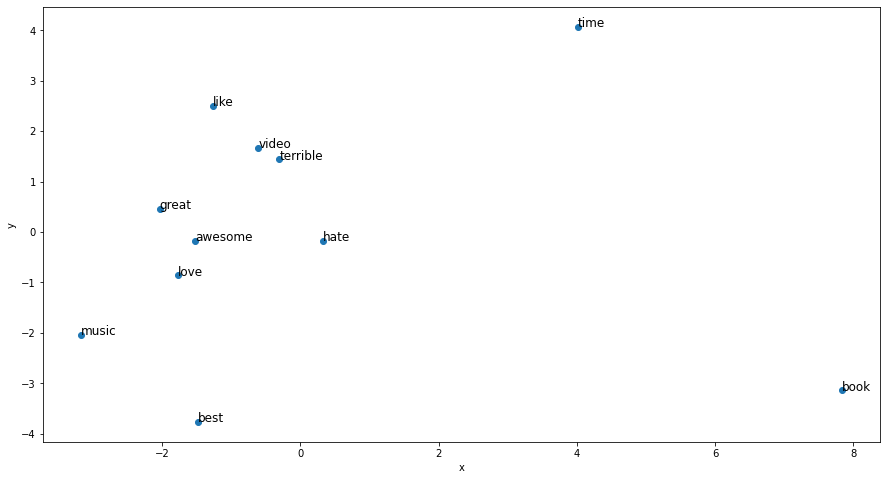

In [201]:

# pick a few words that we want to test out how similar they are
words = ["like", "love", "hate", "awesome", "terrible", "best", "book", "video", "music", "great", "time"]

# get the embedding for each of the words above
word_embeddings = [word2vec.wv[word] for word in words]

# Run PCA with 2 components
# We use 2 components because we want to project the embeddings into 2-dimensional space so that we
# can more easily visualize the similarities between different emeddings (and thus, words)
pca = PCA(n_components=2)
result = pca.fit_transform(word_embeddings).transpose()

x, y = result[0], result[1]

# Plot the PCA-reduced embeddings
fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(x, y) # scatterplot of PCA-reduced points
for i, term in enumerate(words):
    ax.annotate(term, (x[i], y[i]), size = 12) # add text to each plotted word point
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Creating document level features from word2vec

In [202]:
cleaned_x_train.head()

7531     [laura, wa, awesome, cd, say, still, alive, to...
16837    [almost, perfect, seen, man, perform, wa, trul...
18380    [cruder, austen, pride, prejudice, one, favori...
4295     [rude, author, south, bend, indiana, completel...
24726    [classic, old, wafflemaker, love, wafflemaker,...
dtype: object

In [205]:
# Get all of the word embeddings for a single observation.  This observation has 56 word embeddings
# (corresponding to 56 words)
pd.DataFrame([word2vec.wv[word] for word in cleaned_x_train.iloc[0]])

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.020134,0.130281,0.033540,0.101099,0.005136,-0.143527,0.087780,0.300819,0.052455,-0.076731,...,0.011797,0.141618,0.125623,0.006325,0.132154,0.149033,0.050989,-0.091607,0.076778,0.019868
1,0.357055,0.194349,-0.018860,0.713505,-0.425821,-0.859848,0.764272,0.693095,-0.223298,0.019034,...,-0.057343,0.361812,0.091925,-0.279871,0.405833,0.550742,0.270586,-0.358233,0.829451,-0.631561
2,0.008657,0.370442,0.016749,0.270258,0.035565,-0.175960,0.033753,0.869976,0.214923,-0.060175,...,0.484437,0.176494,-0.004626,0.297524,0.707828,0.359939,-0.181113,0.205912,0.121574,-0.268163
3,0.222559,0.946356,0.507095,0.356735,0.353622,-0.138007,0.134309,1.217415,0.051156,-0.894567,...,1.177254,-0.018903,-0.254885,0.339103,0.844650,0.317621,-0.265920,0.925115,0.623192,-0.707583
4,0.281988,0.162283,-0.104483,0.444219,-0.163891,-0.071852,0.488985,0.604469,-0.014363,-0.156150,...,0.145222,0.358256,0.028102,0.272633,0.770660,0.482955,-0.030311,0.007316,0.341802,-0.378816
5,-0.020972,0.542077,-0.270013,-0.350178,-0.023157,-0.418823,-0.122509,0.605409,0.047154,-0.377917,...,0.485225,0.470434,-0.008086,0.178698,0.193005,0.300869,-0.117759,0.337922,-0.077965,-0.008861
6,-0.010067,0.225136,0.074152,0.178641,0.060635,-0.227394,0.100902,0.474977,0.071227,-0.092288,...,-0.002489,0.229992,0.186092,0.020490,0.200403,0.259358,0.103205,-0.217159,0.119152,0.025516
7,0.021315,0.304746,0.093680,0.177836,-0.005646,-0.161454,0.041330,0.466930,0.146572,-0.112237,...,0.164866,0.225295,0.041593,-0.011525,0.242088,0.224107,-0.146554,0.069153,0.201092,-0.040767
8,0.295685,0.593109,0.108351,0.326444,0.000175,-0.239574,-0.127244,0.396309,-0.821343,0.261347,...,0.183693,-0.057039,-0.069823,-0.351589,0.228813,1.166708,0.082743,-0.129097,0.125684,-0.587934
9,0.373069,0.445665,0.143009,-0.076732,-0.304834,-0.386138,0.487022,0.274955,-0.271527,-0.238180,...,0.217088,0.312562,0.166640,0.037264,0.386845,0.452985,-0.093311,-0.207854,0.560194,-0.214871


In [214]:
# Averaged word embeddings for a single observation - this is now a document-level feature for a single observation
frame = pd.DataFrame([word2vec.wv[word] for word in cleaned_x_train.iloc[0]]).mean()
frame = pd.DataFrame(frame).transpose()
frame

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.09507,0.289184,0.065496,0.161382,0.020743,-0.354425,0.114376,0.598018,-0.063699,-0.199558,...,0.169592,0.201025,0.079285,0.022453,0.327248,0.353472,0.020613,-0.057369,0.233658,-0.202083


In [220]:
from tqdm import tqdm
import numpy as np

In [269]:

## Average the emeddings for each document

# Create empty list to hold the average embeddings
avg_embeddings = []

# Loop over each document
for index in tqdm(range(cleaned_x_train.shape[0])):
    
    # get the document by index
    document = cleaned_x_train.iloc[index]
    
    # get word embeddings for the current document in the loop
    # the if condition handles cases where the word is not in the word2vec model 
    # this would include the words that occurred less than 5 times as limited in the code earlier
    embeddings = [word2vec.wv[word] for word in document if word in word2vec.wv]

    # if none of the words have a word embedding, there will be an empty list
    # need 300 dimensions to match the regular cases, so we'll create a list of 300 missing values
    if embeddings == []:
        avg_embeddings.append([np.nan] * 300)
    else:
        # otherwise, just get the mean componentwise across all the word embeddings and append to our list
        avg = np.mean(embeddings, axis = 0)
        avg_embeddings.append(avg)

100%|██████████| 23636/23636 [00:03<00:00, 6097.83it/s]


In [271]:
# convert each array to list
avg_embeddings = [array if isinstance(array, list) else array.tolist() for array in avg_embeddings]

## Create word2vec features

In [274]:
# Create word2vec features
#######################################################

## These are the word2vec features.  Now that we have these, you could cluster these, use them as features in a model
## like logistic regression, random forest, XGBoost, etc.

word2vec_features = pd.DataFrame(avg_embeddings)
word2vec_features

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.095070,0.289185,0.065496,0.161382,0.020743,-0.354425,0.114376,0.598018,-0.063699,-0.199558,...,0.169592,0.201025,0.079285,0.022453,0.327248,0.353472,0.020613,-0.057369,0.233658,-0.202083
1,0.014654,0.326210,0.063735,0.115858,0.070535,-0.310038,0.119517,0.665940,0.077839,-0.235668,...,0.289969,0.271524,0.114391,0.092394,0.430702,0.294391,-0.014734,0.016320,0.164874,-0.096270
2,-0.069020,0.243563,-0.009270,0.079434,0.003828,-0.212163,0.075598,0.541795,0.066891,-0.136794,...,0.069190,0.301757,0.092373,-0.040333,0.295039,0.262840,-0.000014,-0.169535,0.161311,-0.006904
3,0.043672,0.245106,0.024629,0.061345,-0.071077,-0.223696,0.157840,0.461087,-0.035960,-0.140549,...,0.082947,0.227157,0.103940,-0.105498,0.219705,0.341107,0.033517,-0.110738,0.242011,-0.164823
4,0.079344,0.261825,-0.097602,0.155177,-0.076433,-0.278754,0.057866,0.491591,0.126478,-0.069288,...,0.096313,0.274490,0.145120,0.122020,0.253055,0.302471,0.044408,0.003567,0.044672,-0.156243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23631,0.189214,0.243250,-0.130685,0.125417,-0.271025,-0.374663,0.369899,0.568042,0.065939,0.014295,...,0.159254,0.320627,0.183268,-0.135158,0.186192,0.401437,0.087319,0.061373,0.155750,-0.185327
23632,0.068768,0.139779,-0.070979,0.026267,0.015349,-0.266788,0.046528,0.381503,0.079212,-0.103767,...,0.027704,0.268880,0.199869,0.075421,0.102885,0.176729,0.141807,-0.065794,-0.100197,-0.019329
23633,-0.118817,0.337921,-0.152126,0.097169,-0.092614,-0.220146,0.063281,0.527969,0.004806,-0.081006,...,0.031294,0.270788,-0.008109,-0.210535,0.317472,0.362947,0.054432,-0.233645,0.309505,-0.178165
23634,0.037411,0.207623,0.048212,0.016193,-0.040740,-0.207964,0.118343,0.414436,-0.026088,-0.110318,...,0.088731,0.224056,0.162854,-0.041827,0.200680,0.323408,0.002822,-0.014599,0.111090,-0.036632


## TextBlob package - get parts of speech

In [ ]:
#!pip install TextBlob

In [104]:
# import TextBlob
from textblob import TextBlob

In [125]:
# have to run these lines to download necessary dependencies first

#nltk.download("punkt")
#nltk.download("averaged_perceptron_tagger")

In [288]:
blob = TextBlob(x_train.iloc[0])

In [289]:
blob.tags

[('Laura', 'NNP'),
 ('was', 'VBD'),
 ('awesome', 'JJ'),
 ('but', 'CC'),
 ('this', 'DT'),
 ('cd', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('........', 'JJ'),
 ('All', 'DT'),
 ('I', 'PRP'),
 ('have', 'VBP'),
 ('to', 'TO'),
 ('say', 'VB'),
 ('is', 'VBZ'),
 ('if', 'IN'),
 ('she', 'PRP'),
 ('were', 'VBD'),
 ('still', 'RB'),
 ('alive', 'JJ'),
 ('today', 'NN'),
 ('she', 'PRP'),
 ('would', 'MD'),
 ('have', 'VB'),
 ('never', 'RB'),
 ('let', 'VB'),
 ('this', 'DT'),
 ('cd', 'NN'),
 ('happen', 'VBZ'),
 ('like', 'IN'),
 ('it', 'PRP'),
 ('did', 'VBD'),
 ('Yes', 'UH'),
 ('its', 'PRP$'),
 ('great', 'JJ'),
 ('to', 'TO'),
 ('hear', 'VB'),
 ('the', 'DT'),
 ('few', 'JJ'),
 ('last', 'JJ'),
 ('songs', 'NNS'),
 ('but', 'CC'),
 ('I', 'PRP'),
 ('would', 'MD'),
 ('rather', 'RB'),
 ('remember', 'VB'),
 ('her', 'PRP$'),
 ('the', 'DT'),
 ('way', 'NN'),
 ('she', 'PRP'),
 ('was', 'VBD'),
 ('.........', 'JJ'),
 ('I', 'PRP'),
 ('remember', 'VBP'),
 ('being', 'VBG'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('audience', 'NN'),


In [290]:
# Use TextBlob to figure out the parts of speech
# Could potentially use this to create features, as well
blob = TextBlob(x_train.iloc[0])
pos_info = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_info = pos_info.pos.value_counts()

In [291]:
# The below is the count of the parts of speech for a single observation (the 0th observation)
pos_info

PRP     15
NN      15
IN      14
JJ      10
DT      10
RB       9
VB       8
VBD      8
PRP$     7
VBG      6
NNP      6
TO       5
VBP      5
VBZ      4
CC       3
MD       2
NNS      2
CD       2
WRB      2
UH       1
Name: pos, dtype: int64

In [115]:
x_train.iloc[0]

'Laura was awesome but this cd is not........: All I have to say is if she were still alive today she would have never let this cd happen like it did. Yes its great to hear the few last songs but I would rather remember her the way she was.........I remember being in the audience while taping SOLID GOLD when she was doing her 2 numbers.......... It was awesome to see her, I was 12 at the time......... Thats how I want to remember her not by this remixed piece of garbage.......... Plus now "they" are releasing a cd with Challenge all by itself......... trying to cash in on something...Lets remember her the way she was...... not by making her roll over in her grave!'

In [122]:
TextBlob(x_train.loc[3009]).tags

[('ddwadwadwadwa', 'NN')]

## Create a wordcloud

In [ ]:
#!pip install wordcloud

In [278]:
from wordcloud import WordCloud

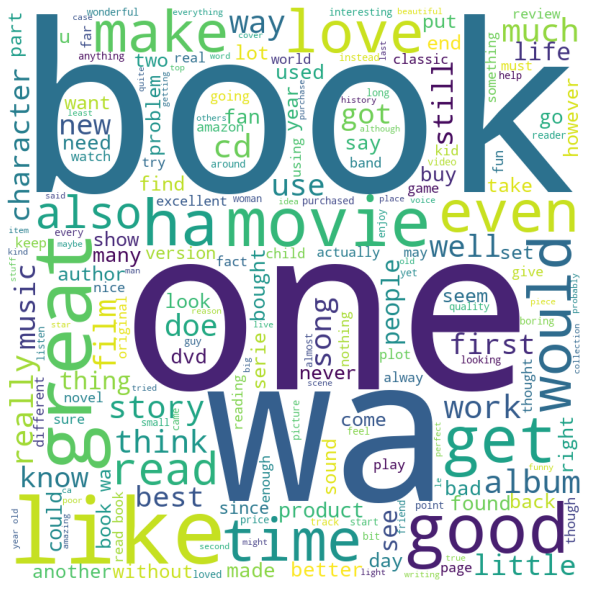

In [286]:

# combine all the text into a single string
combined_text = ""
for index in range(cleaned_x_train.shape[0]):
    combined_text += " ".join(cleaned_x_train.iloc[index])
    combined_text += " "

    
# create word cloud object
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = nltk.corpus.stopwords.words("english"),
                min_font_size = 10).generate(combined_text)
  
# plot the word cloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()